# First solo data science project

So far I have done bits and bobs of data science through online tutorials but I haven't done one on my own. 
Here I will try and go from start to finish with a data science project. 
I'm not particularly interested in getting the absolute best results from my model/models but rather I want to practice piecing together an entire workflow - through data cleaning and exploration, algorithm choice and comparisons and submitting a final trained model. 

As a first project I am using the House Prices challenge from Kaggle:  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques  
This is a supervised learning regression problem and the aim is to predict the final price of homes given a set of features.

Let's go!

## A first look at the data

Using Pandas of course. 

In [1]:
import pandas as pd

df_train = pd.read_csv('C:/Users/Jacob/Dropbox/Side Projects/Kaggle/House Prices in Ames, Iowa/house-prices-advanced-regression-techniques/train.csv',index_col=0)

# The data has 80 columns so this stops pandas from supressing the full output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The data has A LOT of *features*! There are 79 (not counting the SalesPrice *label*)

Each feature details a feature of the house for sale (e.g. the year sold or the number of bedrooms above ground) and the training label will be the sale price. In the test set the sale price is not provided. I will submit my test predictions to Kaggle to see how good they were. 

It will be important to understand each feature properly so that we can:  
1. Convert categorical features to numerical ones.
2. Replace null values. 
3. Combine features that provide the same or similar information.
4. Remove features that are unnecessary. 

... but first lets have a quick look at a couple of things:

In [3]:
# What data types are present? 
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [4]:
# How many null values in each column?
df_train.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

So the features have integer and float numerical values plus string (object) categorical values.  
Several of the rows have null values with a few having very many null values. Already I can see some correlations in the null values for instance there are 81 null values in a lot of the Garage related columns. Presumably these houses don't have a garage. 

Let's look at some key statistics:

In [5]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


And check for any strongly correlated features: We can remove some of these features later. 

In [6]:
corr = df_train.corr()
corr.where(abs(corr)>0.7)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data label and benchmark model
Okay so before we get into cleaning and preparing this data lets just have a quick look at the Sales Price label:

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

prices = df_train['SalePrice']/1000
prices_mean =  prices.mean()

ax = sns.distplot(prices)
ax.plot([prices_mean, prices_mean], [0, 0.01])

ax.set_title('Sales Price Distribution')
ax.set_xlabel('Sales Price ($1000)')
plt.show()



<Figure size 640x480 with 1 Axes>

This shows the distribution of the sales prices. As a benchmark and pretty much simplest possible model we can ignore the features in the test set completely and simply predict the mean house price from the distribution. (Orange line above.)

This is simple model can be created using sklearns Dummy Regressor model. 

(As a point to remember: The distribution shows that the data is highly imbalanced. My models will be trained on many more instances of \\$150k houses than \\$700k houses. I will need to look up how this affects my model. (results in overfitting?))

In [8]:
import sklearn as skl
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

X_train = df_train.copy().drop(['SalePrice'], axis=1)
y_train = df_train['SalePrice']

benchmark = DummyRegressor(strategy='mean')   # This strategry is actually the default.
benchmark.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [9]:
## Two ways to evaluate a regressor
import numpy as np

benchmark_R2 = benchmark.score(X_train, y_train)
print('The R2 score is ', benchmark_R2)

# Kaggle evaluates the RMSE of the log of the training labels and predictions
def kaggle_score(X_train, y_train, model):
    mse = mean_squared_error(np.log(y_train), np.log(model.predict(X_train)))
    rmse = np.sqrt(mse)
    return rmse

benchmark_kaggle_score = kaggle_score(X_train, y_train, benchmark)
print('The Kaggle score (root mean square error of logs) is ', benchmark_kaggle_score)

The R2 score is  0.0
The Kaggle score (root mean square error of logs) is  0.40760050769850525


This benchmark R2 score looks confusing at first but actually it should be expected. The sklearn documentaion for DummyRegressor says:  
*" A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0." *  
The mean squared error is massive as expected.

As a final side note before moving on: I didn't split the data into train/val/test sets for the benchmark model. For such a simple model I don't think it matters. I will split the training data before training the proper models. 

## Pre-processing numerical data and the first ML model

As a first simple attempt to train some models I want to ignore all categorical features and only use numerical features. I will still need to fill in NaN values.


In [10]:
df_num = df_train.select_dtypes(exclude=object)
df_num.drop(['MSSubClass'], axis=1, inplace=True)  # MSSubClass is secretly a categorical feature. Drop it!
df_num = df_num.astype('float')
df_num.head()

C:\Users\Jacob\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
2,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
3,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
4,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
5,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


Now how many NaN values are there?

In [11]:
df_num.isna().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Only LotFrontage, GarageYrBlt, MasVnrArea are missing - what shall we do with the missing values?

**GarageYrBlt:** Let's check the correlation between the year the garage was built with the year the house was built

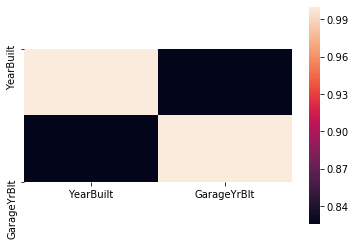

In [12]:
corrmat = df_train[['YearBuilt', 'GarageYrBlt']].corr()
sns.heatmap(corrmat, square=True)

There is a very strong correlation! In this case we can just drop the GarageYrBlt column because it contains basically the same info as YearBuilt. This also removes any problems due to colinearity between the  two features.

(Whilst we're here I will also drop some more features that are highly correlated:

TotalBsmtSF - 1stFlrSF : 0.81953
GrLivArea - TotRmsAbvGrd: 0.825489	
GarageCars - GarageArea: 0.882475	

Drop the one of each pair.
)

In [13]:
df_num.drop(columns=['GarageYrBlt','1stFlrSF','TotRmsAbvGrd','GarageCars'], inplace=True)

**LotFrontage/MasVnrArea:**  I'm going to simply replace these missing values with the mean values for those columns. Partly because I dont currently have a better idea.

In [14]:
df_num.LotFrontage.fillna(df_num.LotFrontage.mean(), inplace=True)
df_num.MasVnrArea.fillna(df_num.MasVnrArea.mean(), inplace=True)

Rescale the numerical values to fit between 0 and 1 using sklearn. 

In [15]:
from sklearn.preprocessing import StandardScaler

y = df_num.pop('SalePrice').to_numpy().reshape(-1, 1)
X = df_num

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = pd.DataFrame(scaler_X.fit_transform(X))   #, columns=X.columns
y = pd.DataFrame(scaler_y.fit_transform(y))

X.head()
y.head()

,0
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843


In [16]:
df_num.isna().sum()

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

Super duper now we're ready to train a model!
One last thing: We need to split the data into train/test/validation sets. Again I will use sklearn.
I will split into 60% training 20% testing 20% validation

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


Now because I have heard that XGBoost is such a popular algorithm I will train a gradient boosting regressor from sklearn. 

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate = 0.1, random_state = 42)
gbr.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Now how good is the model? Drum roll please....
(Need to reverse scaling operation before calulating)

In [19]:
gbr_R2 = gbr.score(X_train, y_train)
print('The R2 score is ', gbr_R2)

gbr_kaggle_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(gbr.predict(X_train))), np.log(scaler_y.inverse_transform(y_train))))
print('The  Kaggle score is ', gbr_kaggle_score)

The R2 score is  0.964052781360388
The  Kaggle score is  0.08856084612137106


Fantastic!  
The R2 score is now nearly 1. (This value ranges from 0 bad to 1 good.) 
The Kaggle score is now 0.08! Checking the Kaggle leaderboard reveals this is the winning score!!! Winner. 
But wait... 
  
Better check the score when using the test and validation sets:


In [20]:
gbr_kaggle_test_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(gbr.predict(X_test))), np.log(scaler_y.inverse_transform(y_test))))
print('The  Kaggle score on the test set is ', gbr_kaggle_test_score)

gbr_kaggle_val_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(gbr.predict(X_val))), np.log(scaler_y.inverse_transform(y_val))))
print('The  Kaggle score on the validation set is ', gbr_kaggle_val_score)

The  Kaggle score on the test set is  0.15513694527256464
The  Kaggle score on the validation set is  0.12401234211949669


Not so good! Checking the leaderboard again reveals I am actually placed approximately 3100th!  
  
I'm a victim of overfitting!
  
To combat this I will do some cross-validation. First up though I want to pre-process the categorical data:

## Pre-processing categorical data

One-hot-encoding. This encodes categorical data as follows:  
e.g. {cat, dog, rat} -> {[1,0,0], [0,1,0], [0,0,1]} .  
One problem to watch out for in one-hot-encoding is that it introduces multicollinearity (rat + dog + cat = 1 always.) This can be problematic in linear regression and also means there are redundant columns in the dataframe. 

I'll use the one-hot encoder from the category_encoders pacakge which improves on sklearns version. 

In [21]:
import category_encoders as ce # this pacckage contains different encoders

df_cat = df_train.select_dtypes(include=object)
# i checked and none of the categorical values are NaN

ohe = ce.OneHotEncoder(use_cat_names=True)
df_cat_ohe = ohe.fit_transform(df_cat)
df_cat_ohe.head()


,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_nan,Alley_Grvl,Alley_Pave,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_Low,LandContour_HLS,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_PosA,Condition1_RRNe,Condition2_Norm,Condition2_Artery,Condition2_RRNn,Condition2_Feedr,Condition2_PosN,Condition2_PosA,Condition2_RRAn,Condition2_RRAe,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_Twnhs,HouseStyle_2Story,HouseStyle_1Story,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_2.5Unf,HouseStyle_2.5Fin,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Flat,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_WdShngl,RoofMatl_Metal,RoofMatl_WdShake,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior1st_HdBoard,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_CemntBd,Exterior1st_Plywood,Exterior1st_AsbShng,Exterior1st_Stucco,Exterior1st_BrkComm,Exterior1st_AsphShn,Exterior1st_Stone,Exterior1st_ImStucc,Exterior1st_CBlock,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_Wd Shng,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_BrkCmn,MasVnrType_nan,ExterQual_Gd,ExterQual_TA,ExterQual_Ex,ExterQual_Fa,ExterCond_TA,ExterCond_Gd,ExterCond_Fa,ExterCond_Po,ExterCond_Ex,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Ex,BsmtQual_nan,BsmtQual_Fa,BsmtCond_TA,BsmtCond_Gd,BsmtCond_nan,BsmtCond_Fa,BsmtCond_Po,BsmtExposure_No,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Av,BsmtExposure_nan,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_Unf,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_nan,BsmtFinType1_LwQ,BsmtFinType2_Unf,BsmtFinType2_BLQ,BsmtFinType2_nan,BsmtFinType2_ALQ,BsmtFinType2_Rec,BsmtFinType2_LwQ,BsmtFinType2_GLQ,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_Fa,HeatingQC_Po,CentralAir_Y,CentralAir_N,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,Electrical_nan,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa,Functional_Typ,Functional_Min1,Functional_Maj1,Functional_Min2,Functional_Mod,Functional_Maj2,Functional_Sev,FireplaceQu_nan,FireplaceQu_TA,FireplaceQu_Gd,FireplaceQu_Fa,FireplaceQu_Ex,FireplaceQu_Po,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_nan,GarageType_Basment,GarageType_2Types,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,GarageFinish_nan,GarageQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_nan,GarageQual_Ex,GarageQual_Po,GarageCond_TA,GarageCond_Fa,GarageCond_nan,GarageCond_Gd,GarageCond_Po,GarageCond_Ex,PavedDrive_Y,PavedDrive_N,PavedDrive_P,PoolQC_nan,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_nan,Fence_MnPrv,Fence_GdWo,Fence_

In [22]:
# Now train a Gradient Boost Regressor on only the categorical data to compare with the numerical data. 

# y is the same as before. 
X = df_cat_ohe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

gbr_cat = GradientBoostingRegressor(learning_rate = 0.1, random_state = 42)
gbr_cat.fit(X_train, y_train.values.ravel())

gbr_cat_kaggle_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(gbr_cat.predict(X_train))), np.log(scaler_y.inverse_transform(y_train))))
print('The  Kaggle score is ', gbr_cat_kaggle_score)

gbr_cat_kaggle_test_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(gbr_cat.predict(X_test))), np.log(scaler_y.inverse_transform(y_test))))
print('The  Kaggle score on the test set is ', gbr_cat_kaggle_test_score)

gbr_cat_kaggle_val_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(gbr_cat.predict(X_val))), np.log(scaler_y.inverse_transform(y_val))))
print('The  Kaggle score on the validation set is ', gbr_cat_kaggle_val_score)

The  Kaggle score is  0.13726835589121417
The  Kaggle score on the test set is  0.2241033370273163
The  Kaggle score on the validation set is  0.19295872606748407


So the categorical data provides a worse model than the numerical data alone. 

I will combine the datasets and train on the full set. This should hopefully provide the best model yet:

In [23]:
X = pd.concat([df_num,df_cat_ohe], axis=1)

scaler_X = StandardScaler()
X = pd.DataFrame(scaler_X.fit_transform(X))   # scale X again. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

gbr_full = GradientBoostingRegressor(learning_rate = 0.1, random_state = 42)
gbr_full.fit(X_train, y_train.values.ravel())

gbr_full_kaggle_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(gbr_full.predict(X_train))), np.log(scaler_y.inverse_transform(y_train))))
print('The  Kaggle score is ', gbr_full_kaggle_score)

gbr_full_kaggle_test_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(gbr_full.predict(X_test))), np.log(scaler_y.inverse_transform(y_test))))
print('The  Kaggle score on the test set is ', gbr_full_kaggle_test_score)

gbr_full_kaggle_val_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(gbr_full.predict(X_val))), np.log(scaler_y.inverse_transform(y_val))))
print('The  Kaggle score on the validation set is ', gbr_full_kaggle_val_score)


The  Kaggle score is  0.08111095866862406
The  Kaggle score on the test set is  0.1449996376083525
The  Kaggle score on the validation set is  0.11548041265979721


This has improved the scores! On all counts. 
However the model is still heavily overfitted to the training set. I will attack this by tuning the model hyperparemeters using cross-validation. 

## Hyperparameter tuning and cross-validation

In [24]:
# code borrowed from LinkedInLearning Applied Machine Learning Foundations course
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# define the kaggle score function
def kaggle_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(y_pred)), np.log(scaler_y.inverse_transform(y_true))))
    # use inverse tranform because running here on scaled data but want to compare with unscaled data. 
    
kaggle_scorer = make_scorer(kaggle_score, greater_is_better=False)

# helper function to display CV results.
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        
# Only create train (80%) sets and test (%20) sets as val set folded into train in CV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)        

gbr = GradientBoostingRegressor()
parameters = {
    'learning_rate': [0.1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3]
}

cv = GridSearchCV(gbr, parameters, cv=5, scoring=kaggle_scorer)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}

-0.135 (+/-0.031) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
-0.131 (+/-0.029) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
-0.131 (+/-0.028) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}


The best model is that with the most estimators (GBR documentation: "this is generally robust to overfitting"). Let's check this model on the test set

In [25]:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, max_depth=3)

gbr.fit(X_train, y_train.values.ravel())

gbr_kaggle_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(gbr.predict(X_train))), np.log(scaler_y.inverse_transform(y_train))))
print('The  Kaggle score is ', gbr_kaggle_score)

gbr_kaggle_test_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(gbr.predict(X_test))), np.log(scaler_y.inverse_transform(y_test))))
print('The  Kaggle score on the test set is ', gbr_kaggle_test_score)


The  Kaggle score is  0.021906082250189075
The  Kaggle score on the test set is  0.11477323347720975


The score on the training set is still very low but the score on the test set is now much lower and would score us in the top 1000 so far. 

As a final step I will try out a couple different models.

## Model selection

Whilst I think the gradient boosting regressor will beat these other methods. I still want to try implementing a couple different algorithms. I won't bother with cross-validation here but just play around to try and optimise the method a little. 

REMINDER: With this project I'm not straining to fully optimise a model. I just want to walk through the steps of a ML project.  

Here I'll try a fully-connected neural network.

In [26]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes = (200, 100, 50, 20))

mlp.fit(X_train, y_train.values.ravel())

mlp_kaggle_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(mlp.predict(X_train))), np.log(scaler_y.inverse_transform(y_train))))
print('The  Kaggle score is ', mlp_kaggle_score)

mlp_kaggle_test_score = np.sqrt(mean_squared_error(np.log(scaler_y.inverse_transform(mlp.predict(X_test))), np.log(scaler_y.inverse_transform(y_test))))
print('The  Kaggle score on the test set is ', mlp_kaggle_test_score)


The  Kaggle score is  0.011757587962536028
The  Kaggle score on the test set is  0.18971053790980977


Not as good as the gradient boosting regressor. Now I'll try an support vector machine and a random forest. 

In [34]:
from sklearn.svm import SVR

svr = SVR(C=1, epsilon=0.01)

svr.fit(X_train, y_train.values.ravel())

svr_kaggle_score = kaggle_score(svr.predict(X_train), y_train)
print('The  Kaggle score is ', svr_kaggle_score)

svr_kaggle_test_score = kaggle_score(svr.predict(X_test), y_test)
print('The  Kaggle score on the test set is ', svr_kaggle_test_score)

C:\Users\Jacob\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The  Kaggle score is  0.061880351106813385
The  Kaggle score on the test set is  0.24213163931306614


In [46]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 200, max_depth = 20)

rfr.fit(X_train, y_train.values.ravel())

rfr_kaggle_score = kaggle_score(rfr.predict(X_train), y_train)
print('The  Kaggle score is ', rfr_kaggle_score)

rfr_kaggle_test_score = kaggle_score(rfr.predict(X_test), y_test)
print('The  Kaggle score on the test set is ', rfr_kaggle_test_score)

The  Kaggle score is  0.06078855444399601
The  Kaggle score on the test set is  0.14116722019832403


So none of the models perform better than the gradient boosting regressor. They could still outperform the GBR with the appropriate tuning but I'm not going to get into that here. Note that without much optimisation the random forest regressor starts at a pretty good baseline. 

## Submitting a model to Kaggle.

So sticking with the GBR, the final step is to predict houseprices from the Kaggle test set (different to the test set I portioned off from the training data) and submit to Kaggle. 

In [54]:
# Import test set
# This has all the features apart from the SalePrice -> the label we are trying to predict. 
kaggle_test = pd.read_csv('C:/Users/Jacob/Dropbox/Side Projects/Kaggle/House Prices in Ames, Iowa/house-prices-advanced-regression-techniques/test.csv',index_col=0)
kaggle_test.head()

# Make same clean-ups and transformations as was made to the training set:
# drop correlated columns
kaggle_test.drop(columns=['GarageYrBlt','1stFlrSF','TotRmsAbvGrd','GarageCars'], inplace=True)
# check NaNs
print('Categorical data')
print(kaggle_test.select_dtypes(include=object).isna().sum() , '\n')
print('Numerical data')
print(kaggle_test.select_dtypes(exclude=object).isna().sum())

#kaggle_test.LotFrontage.fillna(kaggle_test.LotFrontage.mean(), inplace=True)
#kaggle_test.MasVnrArea.fillna(kaggle_test.MasVnrArea.mean(), inplace=True)

Categorical data
MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64 

Numerical data
MSSubCl

RATS! There are loads of missing values in the test set. I should have look at this earlier. 

PoolQC, Fence, MiscFeature, Alley all need to be dropped from my model because they have so many missing values in the test set.
For the rest of the categorical NaNs I will use handle_missing='indicator' in the one-hot-encoding so a new column is created for NaN entries.

For the numerical NaNs I will replace with the mean. 

In [73]:
# Import
kaggle_test = pd.read_csv('C:/Users/Jacob/Dropbox/Side Projects/Kaggle/House Prices in Ames, Iowa/house-prices-advanced-regression-techniques/test.csv',index_col=0)
kaggle_train = pd.read_csv('C:/Users/Jacob/Dropbox/Side Projects/Kaggle/House Prices in Ames, Iowa/house-prices-advanced-regression-techniques/train.csv',index_col=0)
df = pd.concat([kaggle_train, kaggle_test], axis=0)

# Drop rows with too many NaNs and strongly correlated rows
df.drop(columns=['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'GarageYrBlt','1stFlrSF','TotRmsAbvGrd','GarageCars'], inplace = True)

# Fill numerical NaNs with mean 
for column in df.select_dtypes(exclude=object):
    if df[column].isna().sum() != 0:
        df[column].fillna(df[column].mean(), inplace=True)
   

2ndFlrSF
3SsnPorch
BedroomAbvGr
BsmtFinSF1
BsmtFinSF2
BsmtFullBath
BsmtHalfBath
BsmtUnfSF
EnclosedPorch
Fireplaces
FullBath
GarageArea
GrLivArea
HalfBath
KitchenAbvGr
LotArea
LotFrontage
LowQualFinSF
MSSubClass
MasVnrArea
MiscVal
MoSold
OpenPorchSF
OverallCond
OverallQual
PoolArea
SalePrice
ScreenPorch
TotalBsmtSF
WoodDeckSF
YearBuilt
YearRemodAdd
YrSold


C:\Users\Jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.



# TO DO:

Compare with other models?

Pipeline?

Set scorer manually in each model. 

How to identify outliers? 

Best way to replace NaN values? Mean or via correlations? -> Highly correlated so just remove.  Look this up tho. Best practices. 

Cleaning:
Understand each feature. 


In [70]:
df['BedroomAbvGr'].isna().sum()

BedroomAbvGr    1459
BedroomAbvGr    1460
dtype: int64